# EDA


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
warnings.filterwarnings('ignore')

# Настройка отображения
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 10

# Загрузка данных
train_df = pd.read_csv('../data/train_c.csv')
test_df = pd.read_csv('../data/test_c.csv')

print(f"Размер обучающей выборки: {train_df.shape}")
print(f"Размер тестовой выборки: {test_df.shape}")
print(f"\nКолонки: {train_df.shape[1]}")
print(f"\nПервые строки:")
train_df.head()


Размер обучающей выборки: (11017, 35)
Размер тестовой выборки: (5000, 35)

Колонки: 35

Первые строки:


,ApplicationDate,Age,AnnualIncome,CreditScore,LoanAmount,LoanDuration,MaritalStatus,NumberOfDependents,HomeOwnershipStatus,MonthlyDebtPayments,...,JobTenure,EmploymentStatus,EducationLevel,Experience,NetWorth,BaseInterestRate,InterestRate,MonthlyLoanPayment,TotalDebtToIncomeRatio,LoanApproved
0,2010-06-26,27.0,66829.0,549.0,17290.0,60.0,Divorced,1.0,Rent,1095.0,...,4.0,Employed,Associate,4.0,35067.0,0.257790,0.251465,508.970230,0.288013,0.0
1,1996-09-23,55.0,172147.0,850.0,16110.0,36.0,Widowed,1.0,Mortgage,211.0,...,2.0,Employed,High School,33.0,27001.0,0.086110,0.093173,514.675859,0.050585,1.0
2,2015-01-19,51.0,300000.0,850.0,38436.0,36.0,Married,0.0,Mortgage,546.0,...,3.0,Employed,Bachelor,28.0,278382.0,0.108436,0.115443,1268.276385,0.072571,1.0
3,1981-05-12,25.0,34683.0,847.0,19186.0,48.0,Married,0.0,Other,153.0,...,3.0,Employed,High School,0.0,9224.0,0.100686,0.112822,498.505187,0.225415,1.0
4,1995-05-07,55.0,300000.0,850.0,30437.0,48.0,Single,2.0,Rent,562.0,...,5.0,Employed,Bachelor,31.0,4502.0,0.110437,0.089037,756.035156,0.052721,1.0


## 1. Базовая информация о данных


In [19]:
# Базовая информация
print("=== ИНФОРМАЦИЯ О ДАННЫХ ===")
print(f"\nРазмерность: {train_df.shape}")
print(f"\nТипы данных:")
print(train_df.dtypes.value_counts())
print(f"\nПропущенные значения:")
missing = train_df.isnull().sum()
print(missing[missing > 0] if missing.sum() > 0 else "Пропущенных значений нет")
print(f"\nДубликаты: {train_df.duplicated().sum()}")
print(f"\nСтатистика по числовым признакам:")
train_df.describe()


=== ИНФОРМАЦИЯ О ДАННЫХ ===

Размерность: (11017, 35)

Типы данных:
float64    29
object      6
Name: count, dtype: int64

Пропущенные значения:
ApplicationDate                530
Age                            530
AnnualIncome                   530
CreditScore                   1031
LoanAmount                    1031
LoanDuration                   530
MaritalStatus                  530
NumberOfDependents             530
HomeOwnershipStatus            530
MonthlyDebtPayments           1031
CreditCardUtilizationRate      530
NumberOfOpenCreditLines        530
NumberOfCreditInquiries        530
DebtToIncomeRatio              530
BankruptcyHistory             1031
LoanPurpose                   1031
PreviousLoanDefaults           530
PaymentHistory                 530
LengthOfCreditHistory          530
SavingsAccountBalance          530
CheckingAccountBalance        1031
TotalAssets                   1031
TotalLiabilities               530
MonthlyIncome                  530
UtilityBillsPay

,Age,AnnualIncome,CreditScore,LoanAmount,LoanDuration,NumberOfDependents,MonthlyDebtPayments,CreditCardUtilizationRate,NumberOfOpenCreditLines,NumberOfCreditInquiries,...,MonthlyIncome,UtilityBillsPaymentHistory,JobTenure,Experience,NetWorth,BaseInterestRate,InterestRate,MonthlyLoanPayment,TotalDebtToIncomeRatio,LoanApproved
count,10487.000000,10487.000000,9986.000000,9986.000000,10487.000000,10487.000000,9986.000000,10487.000000,10487.000000,10487.000000,...,10487.000000,10487.000000,10487.000000,10487.000000,9.986000e+03,9986.000000,10487.000000,10487.000000,10487.000000,10487.000000
mean,39.850386,131587.872127,678.082716,29874.218306,53.439878,1.568323,546.458642,0.284397,3.033565,0.979498,...,10838.934141,0.784428,4.949271,17.628302,1.542381e+05,0.200392,0.200112,1075.622426,0.517577,0.511776
std,11.614132,115791.941909,175.192486,27705.509722,24.493562,1.418684,501.981888,0.159240,1.740186,0.990927,...,9385.924858,0.123039,2.201100,11.337248,4.622229e+05,0.094388,0.096458,1344.053181,0.894637,0.499885
min,18.000000,15000.000000,300.000000,1063.000000,12.000000,0.000000,13.000000,0.003674,0.000000,0.000000,...,1250.000000,0.259301,0.000000,0.000000,1.004000e+03,0.052494,0.046445,30.008506,0.006064,0.000000
25%,32.000000,20959.500000,550.000000,12658.000000,36.000000,0.000000,233.250000,0.158929,2.000000,0.000000,...,1683.541667,0.708475,3.000000,9.000000,7.252500e+03,0.119908,0.119548,375.872620,0.066734,0.000000
50%,40.000000,89015.000000,722.500000,21828.500000,48.000000,1.000000,398.000000,0.262229,3.000000,1.000000,...,7371.250000,0.803692,5.000000,17.000000,2.742950e+04,0.182023,0.180710,684.878529,0.178193,1.000000
75%,48.000000,257025.000000,850.000000,37158.000000,60.000000,3.000000,685.000000,0.391683,4.000000,2.000000,...,21232.583333,0.879312,6.000000,26.000000,1.241758e+05,0.264709,0.264880,1279.930203,0.637457,1.000000
max,80.000000,748508.000000,850.000000,418997.000000,120.000000,6.000000,10879.000000,0.914635,12.000000,6.000000,...,25000.000000,0.996573,17.000000,57.000000,1.126117e+07,0.722497,0.833647,29634.807816,24.383046,1.000000


In [20]:
# Информация о категориальных признаках
print("=== КАТЕГОРИАЛЬНЫЕ ПРИЗНАКИ ===")
categorical_cols = train_df.select_dtypes(include=['object']).columns.tolist()
print(f"Категориальные признаки: {categorical_cols}")

for col in categorical_cols:
    print(f"\n{col}:")
    print(train_df[col].value_counts())
    print(f"Уникальных значений: {train_df[col].nunique()}")


=== КАТЕГОРИАЛЬНЫЕ ПРИЗНАКИ ===
Категориальные признаки: ['ApplicationDate', 'MaritalStatus', 'HomeOwnershipStatus', 'LoanPurpose', 'EmploymentStatus', 'EducationLevel']

ApplicationDate:
ApplicationDate
1988-12-02    3
1986-05-04    3
2004-03-27    3
1995-04-25    3
1996-04-03    3
             ..
1984-03-07    1
2018-08-07    1
2017-04-29    1
1993-05-22    1
1993-02-23    1
Name: count, Length: 10000, dtype: int64
Уникальных значений: 10000

MaritalStatus:
MaritalStatus
Married     5145
Single      3217
Divorced    1562
Widowed      563
Name: count, dtype: int64
Уникальных значений: 4

HomeOwnershipStatus:
HomeOwnershipStatus
Mortgage    4148
Rent        3186
Own         2116
Other       1037
Name: count, dtype: int64
Уникальных значений: 4

LoanPurpose:
LoanPurpose
Home                  2981
Debt Consolidation    2446
Auto                  2010
Education             1601
Other                  948
Name: count, dtype: int64
Уникальных значений: 5

EmploymentStatus:
EmploymentStatus


## 2. Анализ целевой переменной (LoanApproved)


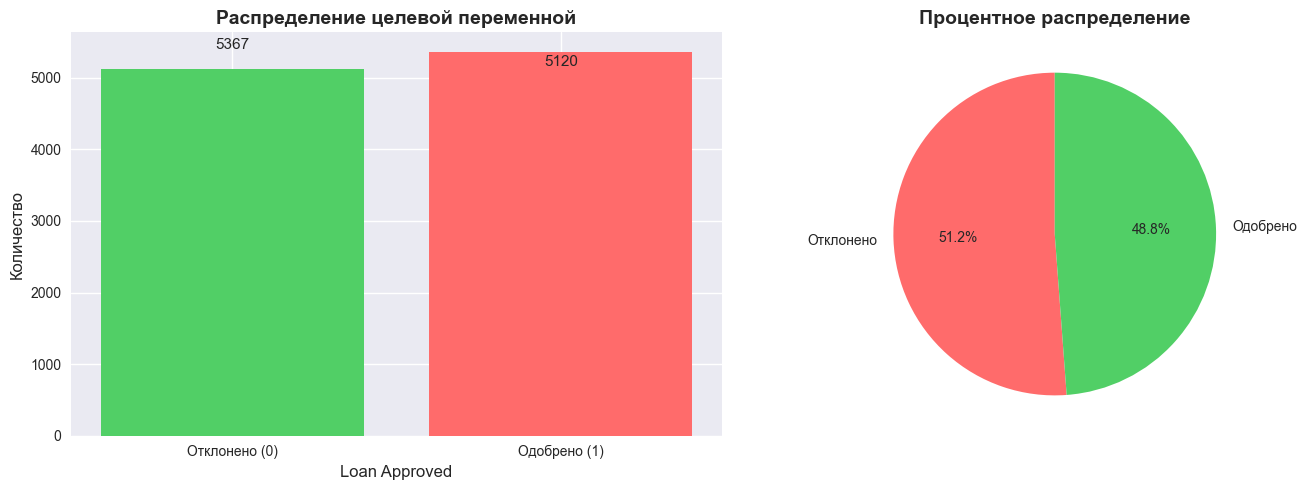

Одобрено кредитов: 5367 (48.72%)
Отклонено кредитов: 5120 (46.47%)
Баланс классов: 1.05


In [ ]:
# Распределение целевой переменной
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Столбчатая диаграмма
target_counts = train_df['LoanApproved'].value_counts()
axes[0].bar(target_counts.index, target_counts.values, color=['#ff6b6b', '#51cf66'])
axes[0].set_xlabel('Loan Approved', fontsize=12)
axes[0].set_ylabel('Количество', fontsize=12)
axes[0].set_title('Распределение целевой переменной', fontsize=14, fontweight='bold')
axes[0].set_xticks([0, 1])
axes[0].set_xticklabels(['Отклонено (0)', 'Одобрено (1)'])
for i, v in enumerate(target_counts.values):
    axes[0].text(i, v, str(v), ha='center', va='bottom', fontsize=11)

# Круговая диаграмма
axes[1].pie(target_counts.values, labels=['Отклонено', 'Одобрено'], 
            autopct='%1.1f%%', colors=['#ff6b6b', '#51cf66'], startangle=90)
axes[1].set_title('Процентное распределение', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

print(f"Одобрено кредитов: {target_counts[1]} ({target_counts[1]/len(train_df)*100:.2f}%)")
print(f"Отклонено кредитов: {target_counts[0]} ({target_counts[0]/len(train_df)*100:.2f}%)")
print(f"Баланс классов: {target_counts[1]/target_counts[0]:.2f}")


## 3. Графики зависимости признаков друг от друга


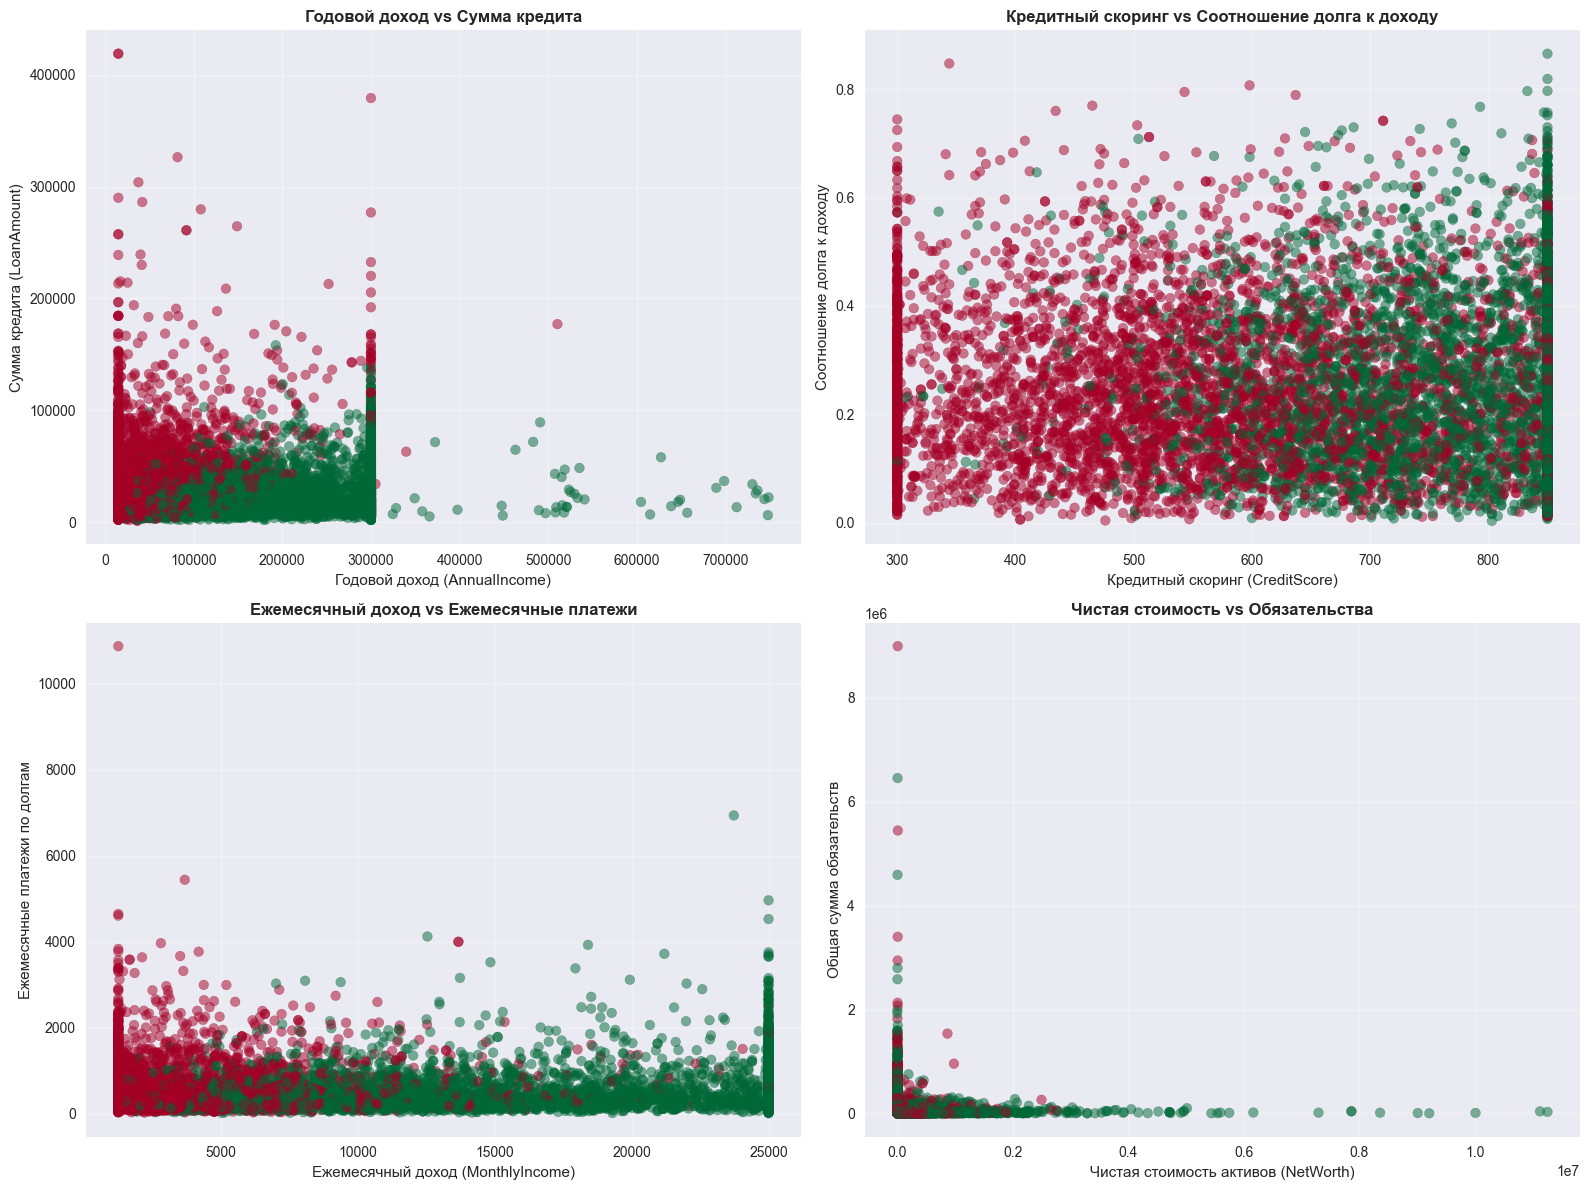

In [ ]:
# Взаимосвязь между ключевыми финансовыми показателями
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# 1. AnnualIncome vs LoanAmount
axes[0, 0].scatter(train_df['AnnualIncome'], train_df['LoanAmount'], 
                   alpha=0.5, c=train_df['LoanApproved'], cmap='RdYlGn')
axes[0, 0].set_xlabel('Годовой доход (AnnualIncome)', fontsize=11)
axes[0, 0].set_ylabel('Сумма кредита (LoanAmount)', fontsize=11)
axes[0, 0].set_title('Годовой доход vs Сумма кредита', fontsize=12, fontweight='bold')
axes[0, 0].grid(True, alpha=0.3)

# 2. CreditScore vs DebtToIncomeRatio
axes[0, 1].scatter(train_df['CreditScore'], train_df['DebtToIncomeRatio'], 
                   alpha=0.5, c=train_df['LoanApproved'], cmap='RdYlGn')
axes[0, 1].set_xlabel('Кредитный скоринг (CreditScore)', fontsize=11)
axes[0, 1].set_ylabel('Соотношение долга к доходу', fontsize=11)
axes[0, 1].set_title('Кредитный скоринг vs Соотношение долга к доходу', fontsize=12, fontweight='bold')
axes[0, 1].grid(True, alpha=0.3)

# 3. MonthlyIncome vs MonthlyDebtPayments
axes[1, 0].scatter(train_df['MonthlyIncome'], train_df['MonthlyDebtPayments'], 
                   alpha=0.5, c=train_df['LoanApproved'], cmap='RdYlGn')
axes[1, 0].set_xlabel('Ежемесячный доход (MonthlyIncome)', fontsize=11)
axes[1, 0].set_ylabel('Ежемесячные платежи по долгам', fontsize=11)
axes[1, 0].set_title('Ежемесячный доход vs Ежемесячные платежи', fontsize=12, fontweight='bold')
axes[1, 0].grid(True, alpha=0.3)

# 4. NetWorth vs TotalLiabilities
axes[1, 1].scatter(train_df['NetWorth'], train_df['TotalLiabilities'], 
                   alpha=0.5, c=train_df['LoanApproved'], cmap='RdYlGn')
axes[1, 1].set_xlabel('Чистая стоимость активов (NetWorth)', fontsize=11)
axes[1, 1].set_ylabel('Общая сумма обязательств', fontsize=11)
axes[1, 1].set_title('Чистая стоимость vs Обязательства', fontsize=12, fontweight='bold')
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


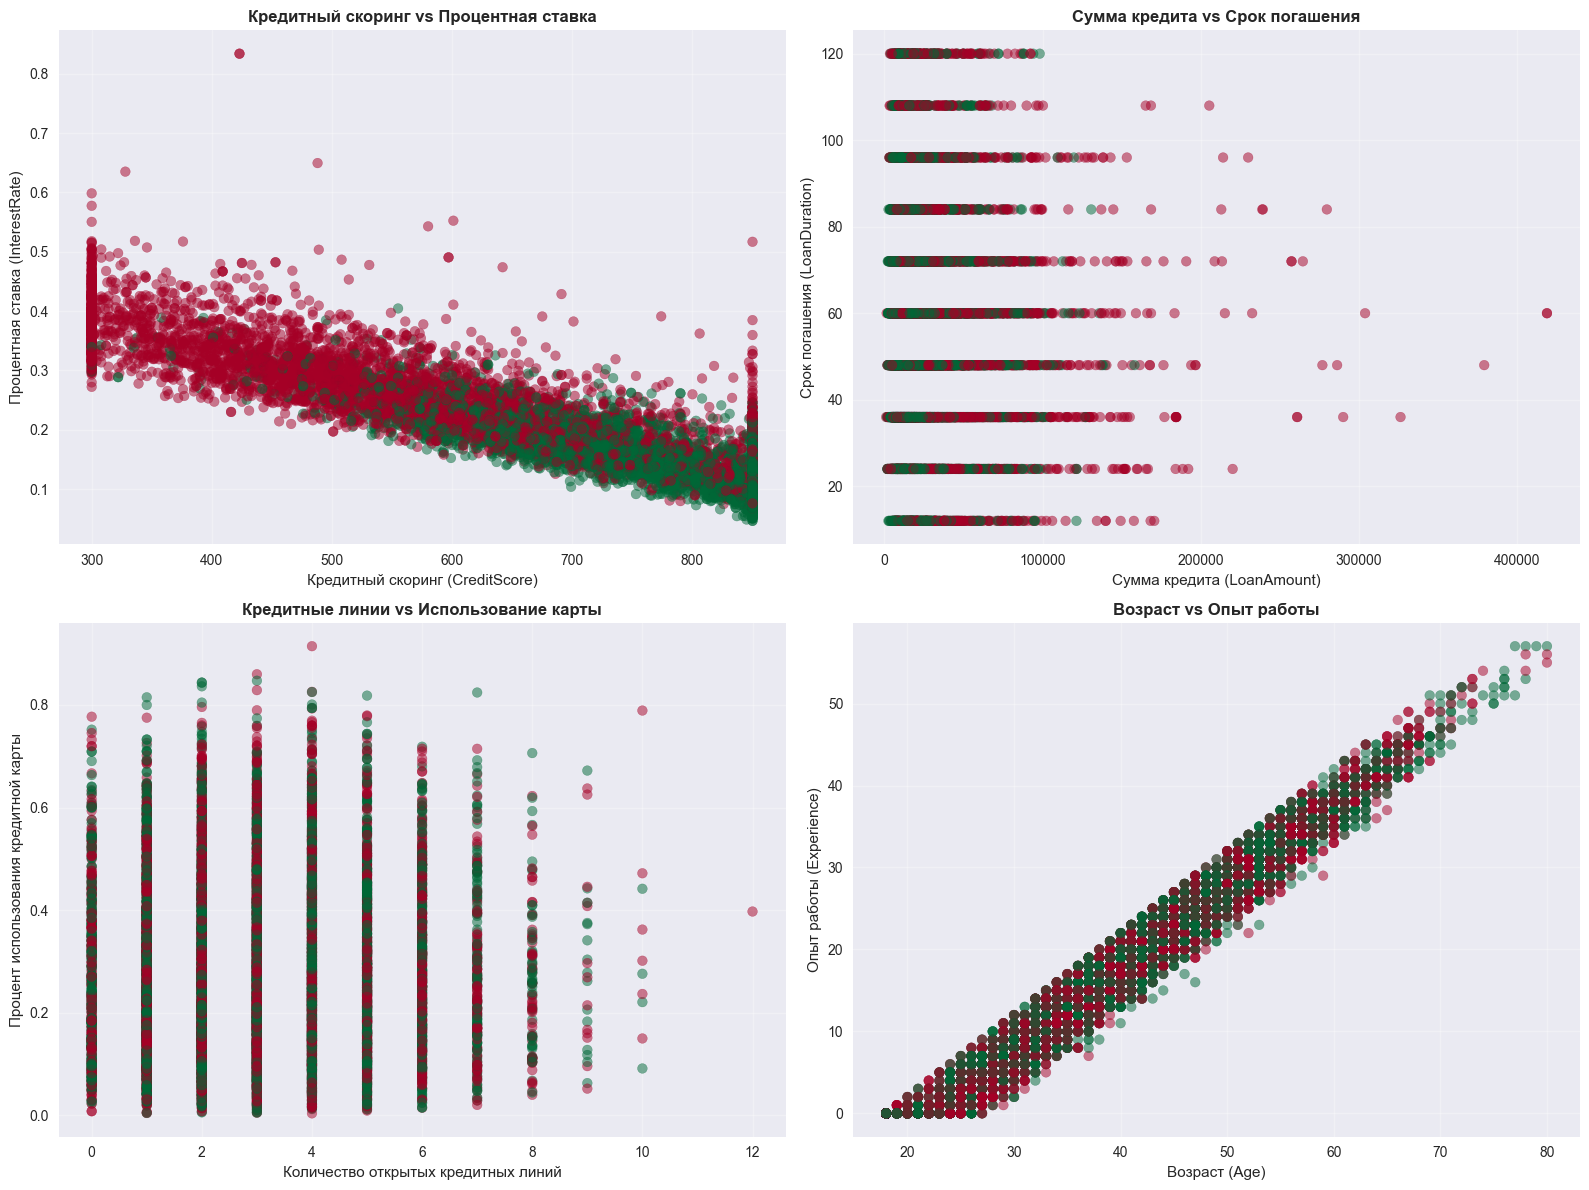

In [ ]:
# Взаимосвязь между кредитными показателями
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# 1. CreditScore vs InterestRate
axes[0, 0].scatter(train_df['CreditScore'], train_df['InterestRate'], 
                   alpha=0.5, c=train_df['LoanApproved'], cmap='RdYlGn')
axes[0, 0].set_xlabel('Кредитный скоринг (CreditScore)', fontsize=11)
axes[0, 0].set_ylabel('Процентная ставка (InterestRate)', fontsize=11)
axes[0, 0].set_title('Кредитный скоринг vs Процентная ставка', fontsize=12, fontweight='bold')
axes[0, 0].grid(True, alpha=0.3)

# 2. LoanAmount vs LoanDuration
axes[0, 1].scatter(train_df['LoanAmount'], train_df['LoanDuration'], 
                   alpha=0.5, c=train_df['LoanApproved'], cmap='RdYlGn')
axes[0, 1].set_xlabel('Сумма кредита (LoanAmount)', fontsize=11)
axes[0, 1].set_ylabel('Срок погашения (LoanDuration)', fontsize=11)
axes[0, 1].set_title('Сумма кредита vs Срок погашения', fontsize=12, fontweight='bold')
axes[0, 1].grid(True, alpha=0.3)

# 3. NumberOfOpenCreditLines vs CreditCardUtilizationRate
axes[1, 0].scatter(train_df['NumberOfOpenCreditLines'], train_df['CreditCardUtilizationRate'], 
                   alpha=0.5, c=train_df['LoanApproved'], cmap='RdYlGn')
axes[1, 0].set_xlabel('Количество открытых кредитных линий', fontsize=11)
axes[1, 0].set_ylabel('Процент использования кредитной карты', fontsize=11)
axes[1, 0].set_title('Кредитные линии vs Использование карты', fontsize=12, fontweight='bold')
axes[1, 0].grid(True, alpha=0.3)

# 4. Age vs Experience
axes[1, 1].scatter(train_df['Age'], train_df['Experience'], 
                   alpha=0.5, c=train_df['LoanApproved'], cmap='RdYlGn')
axes[1, 1].set_xlabel('Возраст (Age)', fontsize=11)
axes[1, 1].set_ylabel('Опыт работы (Experience)', fontsize=11)
axes[1, 1].set_title('Возраст vs Опыт работы', fontsize=12, fontweight='bold')
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


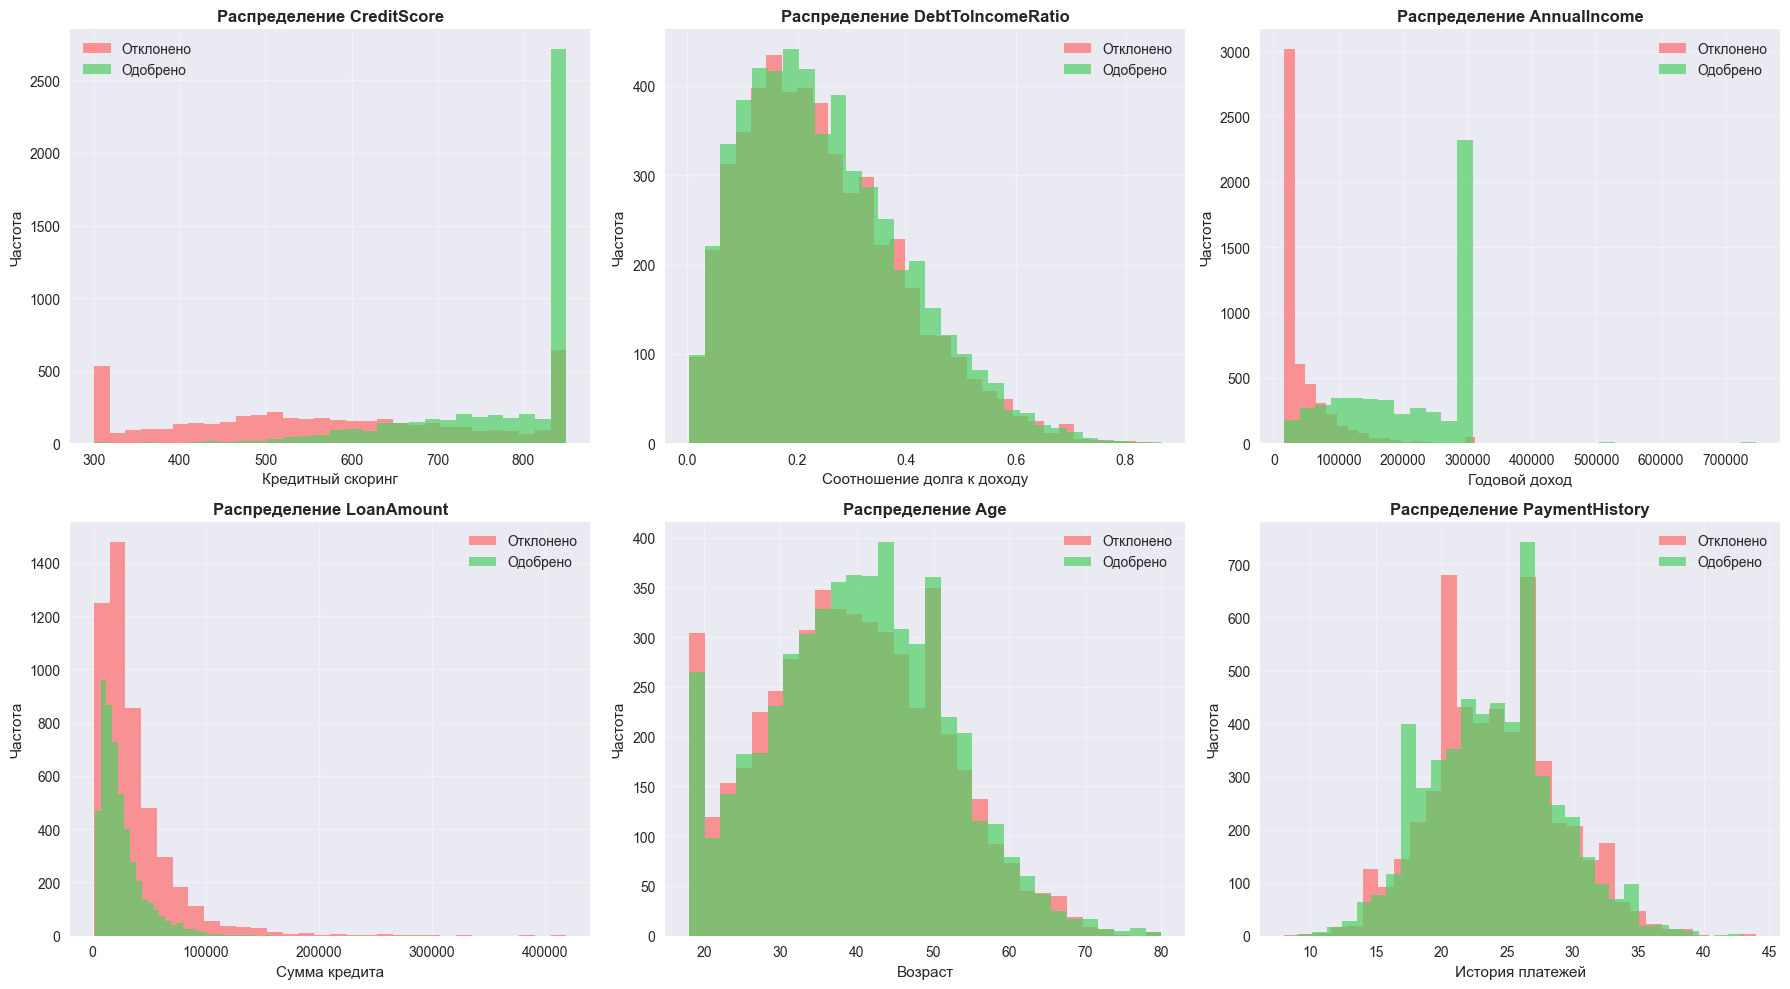

In [ ]:
# Распределение ключевых признаков в зависимости от целевой переменной
fig, axes = plt.subplots(2, 3, figsize=(18, 10))

# 1. CreditScore
axes[0, 0].hist(train_df[train_df['LoanApproved']==0]['CreditScore'], 
                bins=30, alpha=0.7, label='Отклонено', color='#ff6b6b')
axes[0, 0].hist(train_df[train_df['LoanApproved']==1]['CreditScore'], 
                bins=30, alpha=0.7, label='Одобрено', color='#51cf66')
axes[0, 0].set_xlabel('Кредитный скоринг', fontsize=11)
axes[0, 0].set_ylabel('Частота', fontsize=11)
axes[0, 0].set_title('Распределение CreditScore', fontsize=12, fontweight='bold')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

# 2. DebtToIncomeRatio
axes[0, 1].hist(train_df[train_df['LoanApproved']==0]['DebtToIncomeRatio'], 
                bins=30, alpha=0.7, label='Отклонено', color='#ff6b6b')
axes[0, 1].hist(train_df[train_df['LoanApproved']==1]['DebtToIncomeRatio'], 
                bins=30, alpha=0.7, label='Одобрено', color='#51cf66')
axes[0, 1].set_xlabel('Соотношение долга к доходу', fontsize=11)
axes[0, 1].set_ylabel('Частота', fontsize=11)
axes[0, 1].set_title('Распределение DebtToIncomeRatio', fontsize=12, fontweight='bold')
axes[0, 1].legend()
axes[0, 1].grid(True, alpha=0.3)

# 3. AnnualIncome
axes[0, 2].hist(train_df[train_df['LoanApproved']==0]['AnnualIncome'], 
                bins=30, alpha=0.7, label='Отклонено', color='#ff6b6b')
axes[0, 2].hist(train_df[train_df['LoanApproved']==1]['AnnualIncome'], 
                bins=30, alpha=0.7, label='Одобрено', color='#51cf66')
axes[0, 2].set_xlabel('Годовой доход', fontsize=11)
axes[0, 2].set_ylabel('Частота', fontsize=11)
axes[0, 2].set_title('Распределение AnnualIncome', fontsize=12, fontweight='bold')
axes[0, 2].legend()
axes[0, 2].grid(True, alpha=0.3)

# 4. LoanAmount
axes[1, 0].hist(train_df[train_df['LoanApproved']==0]['LoanAmount'], 
                bins=30, alpha=0.7, label='Отклонено', color='#ff6b6b')
axes[1, 0].hist(train_df[train_df['LoanApproved']==1]['LoanAmount'], 
                bins=30, alpha=0.7, label='Одобрено', color='#51cf66')
axes[1, 0].set_xlabel('Сумма кредита', fontsize=11)
axes[1, 0].set_ylabel('Частота', fontsize=11)
axes[1, 0].set_title('Распределение LoanAmount', fontsize=12, fontweight='bold')
axes[1, 0].legend()
axes[1, 0].grid(True, alpha=0.3)

# 5. Age
axes[1, 1].hist(train_df[train_df['LoanApproved']==0]['Age'], 
                bins=30, alpha=0.7, label='Отклонено', color='#ff6b6b')
axes[1, 1].hist(train_df[train_df['LoanApproved']==1]['Age'], 
                bins=30, alpha=0.7, label='Одобрено', color='#51cf66')
axes[1, 1].set_xlabel('Возраст', fontsize=11)
axes[1, 1].set_ylabel('Частота', fontsize=11)
axes[1, 1].set_title('Распределение Age', fontsize=12, fontweight='bold')
axes[1, 1].legend()
axes[1, 1].grid(True, alpha=0.3)

# 6. PaymentHistory
axes[1, 2].hist(train_df[train_df['LoanApproved']==0]['PaymentHistory'], 
                bins=30, alpha=0.7, label='Отклонено', color='#ff6b6b')
axes[1, 2].hist(train_df[train_df['LoanApproved']==1]['PaymentHistory'], 
                bins=30, alpha=0.7, label='Одобрено', color='#51cf66')
axes[1, 2].set_xlabel('История платежей', fontsize=11)
axes[1, 2].set_ylabel('Частота', fontsize=11)
axes[1, 2].set_title('Распределение PaymentHistory', fontsize=12, fontweight='bold')
axes[1, 2].legend()
axes[1, 2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


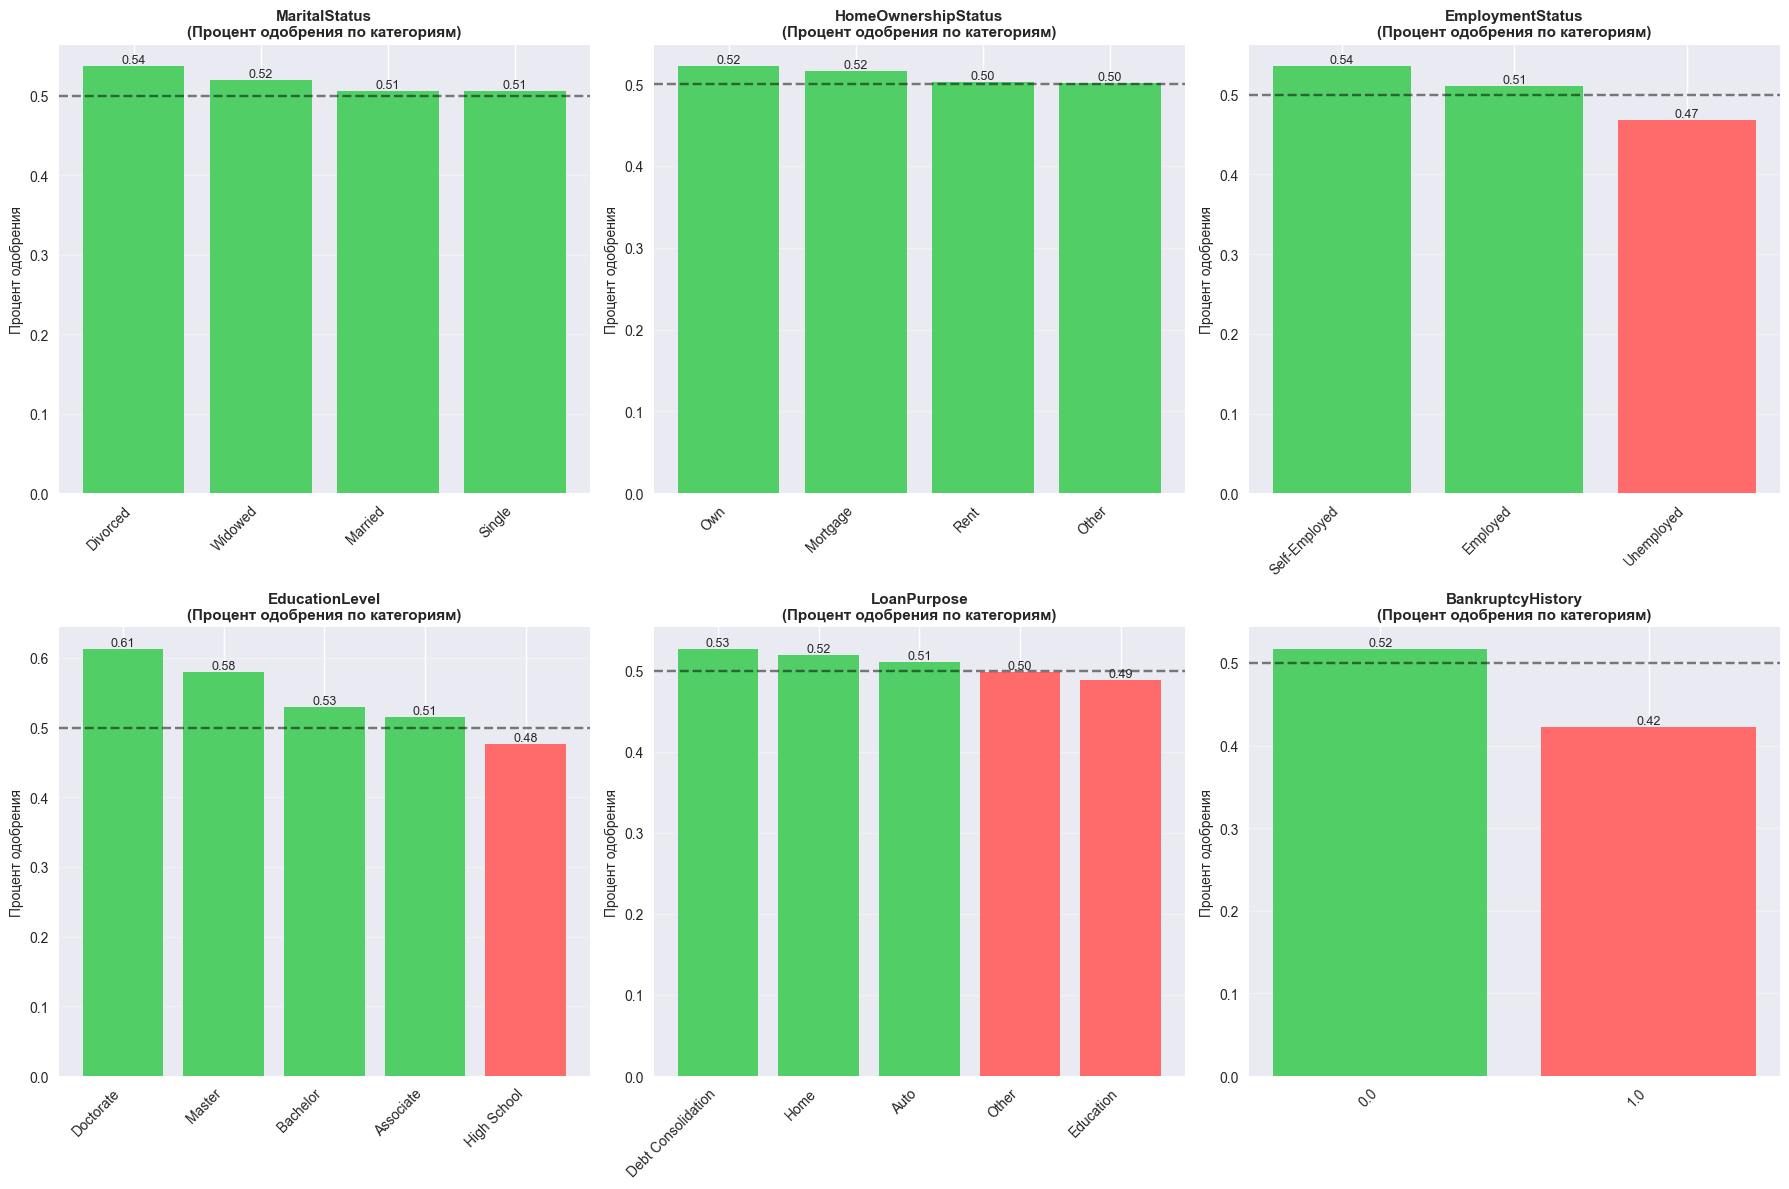

In [ ]:
# Анализ категориальных признаков
categorical_cols = ['MaritalStatus', 'HomeOwnershipStatus', 'EmploymentStatus', 
                     'EducationLevel', 'LoanPurpose', 'BankruptcyHistory']

fig, axes = plt.subplots(2, 3, figsize=(18, 12))

for idx, col in enumerate(categorical_cols):
    row = idx // 3
    col_idx = idx % 3
    
    # Подсчет процента одобрений для каждой категории
    approval_rate = train_df.groupby(col)['LoanApproved'].mean().sort_values(ascending=False)
    counts = train_df[col].value_counts()
    
    axes[row, col_idx].bar(range(len(approval_rate)), approval_rate.values, 
                           color=['#51cf66' if x > 0.5 else '#ff6b6b' for x in approval_rate.values])
    axes[row, col_idx].set_xticks(range(len(approval_rate)))
    axes[row, col_idx].set_xticklabels(approval_rate.index, rotation=45, ha='right')
    axes[row, col_idx].set_ylabel('Процент одобрения', fontsize=10)
    axes[row, col_idx].set_title(f'{col}\n(Процент одобрения по категориям)', fontsize=11, fontweight='bold')
    axes[row, col_idx].axhline(y=0.5, color='black', linestyle='--', alpha=0.5)
    axes[row, col_idx].grid(True, alpha=0.3, axis='y')
    
    # Добавление значений на столбцы
    for i, v in enumerate(approval_rate.values):
        axes[row, col_idx].text(i, v, f'{v:.2f}', ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()


## 4. Матрица корреляций


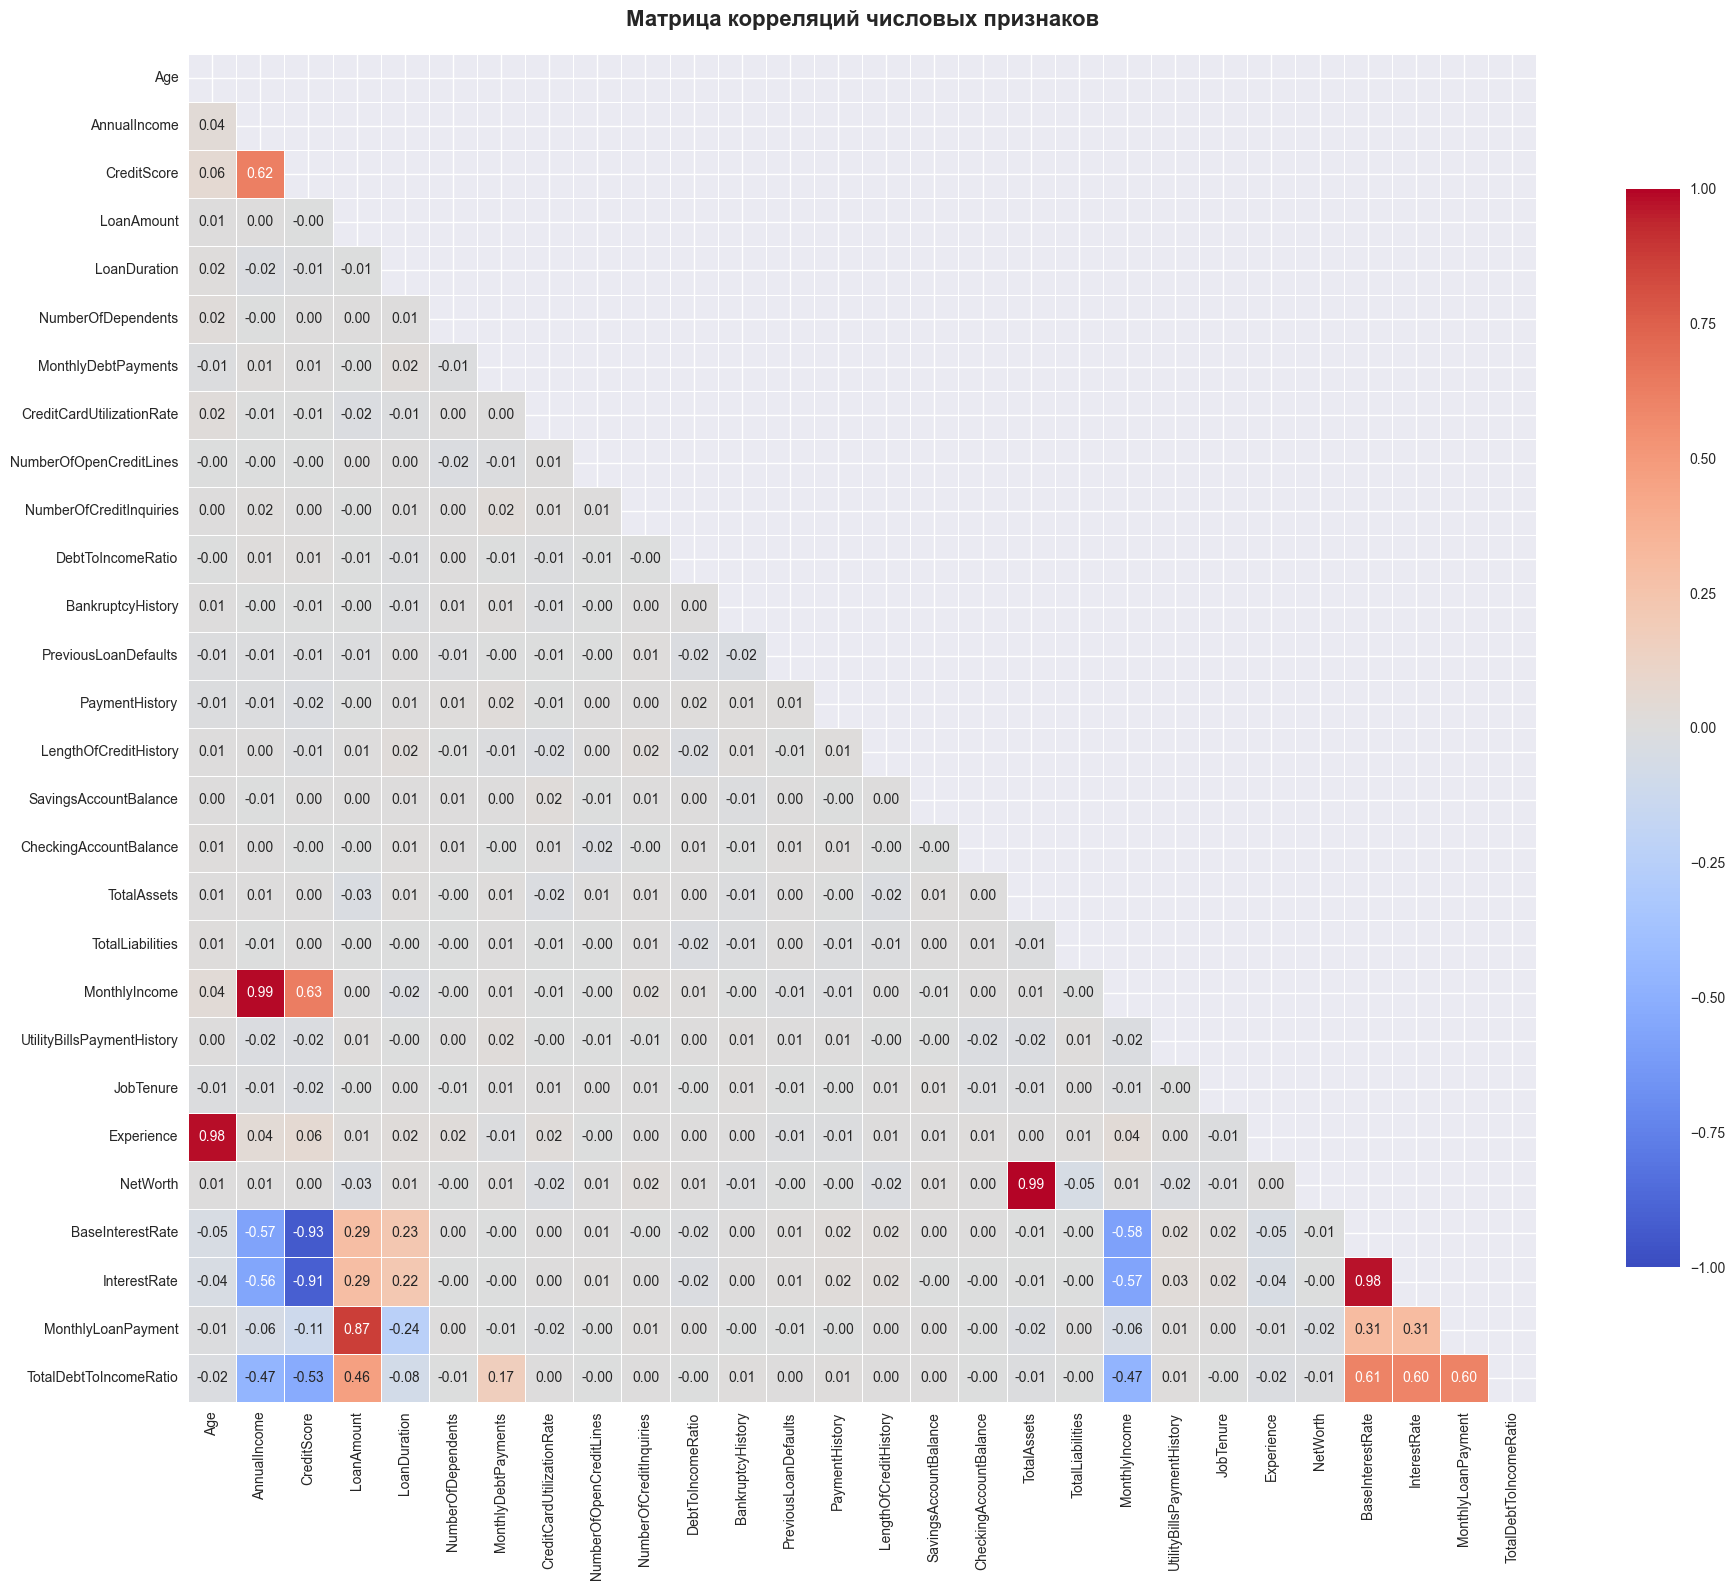

In [ ]:
# Выбор числовых признаков для корреляционной матрицы
numeric_cols = train_df.select_dtypes(include=[np.number]).columns.tolist()
# Исключаем целевую переменную для отдельного анализа
corr_cols = [col for col in numeric_cols if col != 'LoanApproved']

# Вычисление корреляционной матрицы
correlation_matrix = train_df[corr_cols].corr()

# Построение тепловой карты корреляций
plt.figure(figsize=(20, 16))
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))  # Маска для верхнего треугольника
sns.heatmap(correlation_matrix, mask=mask, annot=True, fmt='.2f', cmap='coolwarm', 
            center=0, square=True, linewidths=0.5, cbar_kws={"shrink": 0.8},
            vmin=-1, vmax=1)
plt.title('Матрица корреляций числовых признаков', fontsize=16, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()


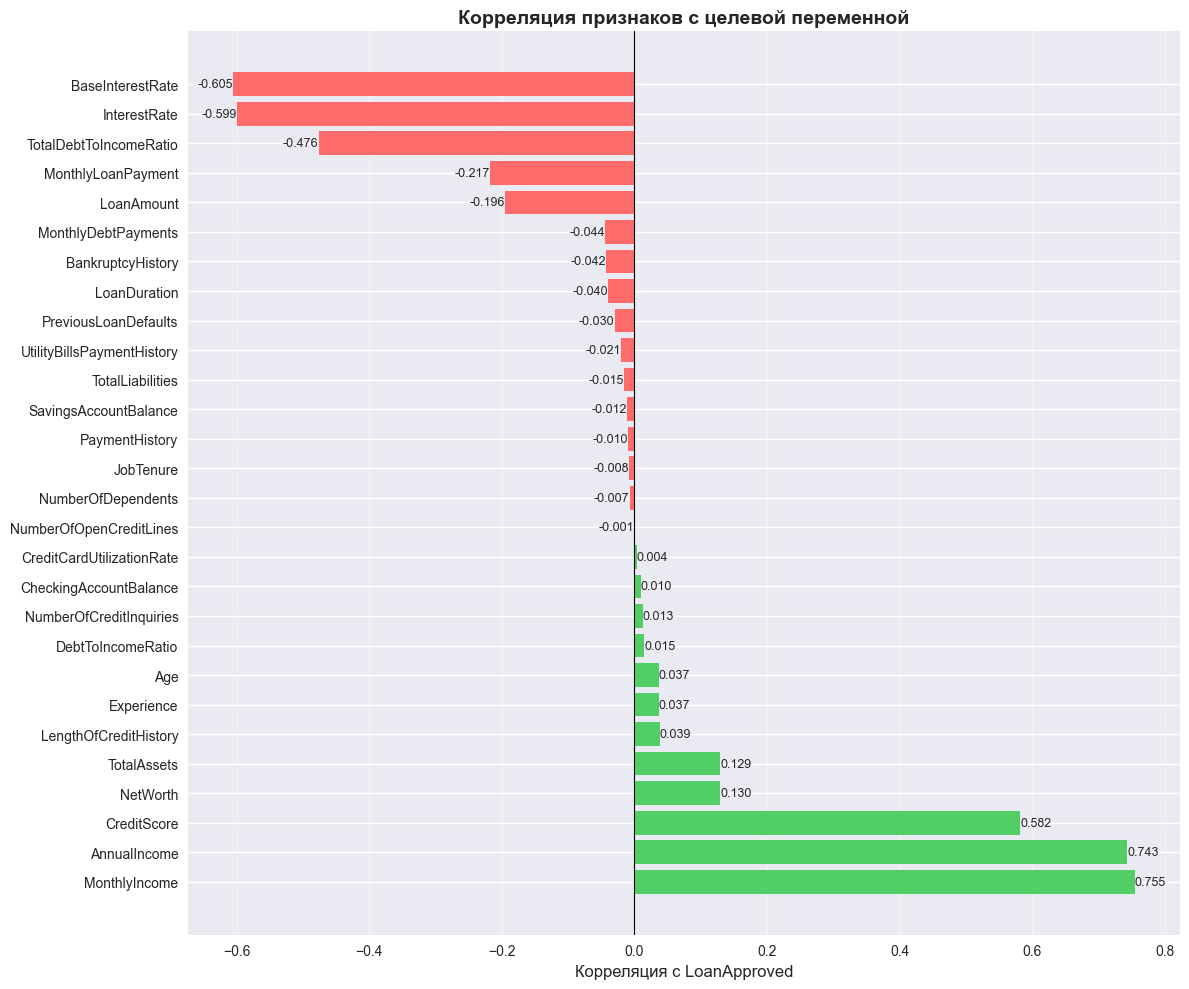

Топ-10 признаков с наибольшей корреляцией с целевой переменной:
MonthlyIncome              0.754853
AnnualIncome               0.743034
CreditScore                0.581812
NetWorth                   0.129624
TotalAssets                0.129204
LengthOfCreditHistory      0.038509
Experience                 0.036699
Age                        0.036580
DebtToIncomeRatio          0.014922
NumberOfCreditInquiries    0.012520
Name: LoanApproved, dtype: float64

Топ-10 признаков с наименьшей корреляцией с целевой переменной:
UtilityBillsPaymentHistory   -0.020812
PreviousLoanDefaults         -0.029994
LoanDuration                 -0.039908
BankruptcyHistory            -0.042160
MonthlyDebtPayments          -0.044257
LoanAmount                   -0.195607
MonthlyLoanPayment           -0.217369
TotalDebtToIncomeRatio       -0.476222
InterestRate                 -0.599180
BaseInterestRate             -0.605164
Name: LoanApproved, dtype: float64


In [ ]:
# Корреляция признаков с целевой переменной
target_corr = train_df[numeric_cols].corr()['LoanApproved'].sort_values(ascending=False)
target_corr = target_corr.drop('LoanApproved')  # Убираем саму целевую переменную

plt.figure(figsize=(12, 10))
colors = ['#51cf66' if x > 0 else '#ff6b6b' for x in target_corr.values]
plt.barh(range(len(target_corr)), target_corr.values, color=colors)
plt.yticks(range(len(target_corr)), target_corr.index)
plt.xlabel('Корреляция с LoanApproved', fontsize=12)
plt.title('Корреляция признаков с целевой переменной', fontsize=14, fontweight='bold')
plt.axvline(x=0, color='black', linestyle='-', linewidth=0.8)
plt.grid(True, alpha=0.3, axis='x')

# Добавление значений на столбцы
for i, v in enumerate(target_corr.values):
    plt.text(v, i, f'{v:.3f}', va='center', 
             ha='left' if v > 0 else 'right', fontsize=9)

plt.tight_layout()
plt.show()

print("Топ-10 признаков с наибольшей корреляцией с целевой переменной:")
print(target_corr.head(10))
print("\nТоп-10 признаков с наименьшей корреляцией с целевой переменной:")
print(target_corr.tail(10))


In [ ]:
# Анализ сильных корреляций между признаками (потенциальная мультиколлинеарность)
high_corr_pairs = []
for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        corr_val = correlation_matrix.iloc[i, j]
        if abs(corr_val) > 0.7:  # Порог для сильной корреляции
            high_corr_pairs.append({
                'Feature1': correlation_matrix.columns[i],
                'Feature2': correlation_matrix.columns[j],
                'Correlation': corr_val
            })

if high_corr_pairs:
    high_corr_df = pd.DataFrame(high_corr_pairs).sort_values('Correlation', key=abs, ascending=False)
    print("Пары признаков с сильной корреляцией (|r| > 0.7):")
    print(high_corr_df.to_string(index=False))
else:
    print("Нет пар признаков с очень сильной корреляцией (|r| > 0.7)")


Пары признаков с сильной корреляцией (|r| > 0.7):
        Feature1           Feature2  Correlation
     TotalAssets           NetWorth     0.994042
    AnnualIncome      MonthlyIncome     0.985384
             Age         Experience     0.982995
BaseInterestRate       InterestRate     0.975359
     CreditScore   BaseInterestRate    -0.931766
     CreditScore       InterestRate    -0.907621
      LoanAmount MonthlyLoanPayment     0.872539


## 5. Выводы и подготовка данных для обучения


In [ ]:
# Статистика по группам одобренных/отклоненных кредитов
print("=== СРАВНИТЕЛЬНЫЙ АНАЛИЗ ===")
print("\nСредние значения ключевых признаков:")

key_features = ['CreditScore', 'AnnualIncome', 'DebtToIncomeRatio', 'LoanAmount', 
                'PaymentHistory', 'Age', 'NetWorth', 'MonthlyIncome']

comparison = pd.DataFrame({
    'Отклонено': train_df[train_df['LoanApproved']==0][key_features].mean(),
    'Одобрено': train_df[train_df['LoanApproved']==1][key_features].mean()
})
comparison['Разница'] = comparison['Одобрено'] - comparison['Отклонено']
comparison['Разница %'] = (comparison['Разница'] / comparison['Отклонено'] * 100).round(2)

print(comparison)


=== СРАВНИТЕЛЬНЫЙ АНАЛИЗ ===

Средние значения ключевых признаков:
                      Отклонено       Одобрено        Разница  Разница %
CreditScore          573.616222     777.525997     203.909775      35.55
AnnualIncome       43503.901563  215618.043413  172114.141851     395.63
DebtToIncomeRatio      0.248402       0.252717       0.004315       1.74
LoanAmount         35428.526283   24586.986122  -10841.540161     -30.60
PaymentHistory        24.058789      23.961245      -0.097544      -0.41
Age                   39.415430      40.265325       0.849895       2.16
NetWorth           92831.625667  212691.933933  119860.308265     129.12
MonthlyIncome       3585.400716   17758.645550   14173.244834     395.30


### Выводы из EDA:

1. **Целевая переменная**: 
   - Распределение классов (баланс классов)
   - Необходимо проверить на дисбаланс

2. **Ключевые факторы одобрения кредита**:
   - Признаки с высокой корреляцией с целевой переменной
   - Категориальные признаки, влияющие на решение

3. **Мультиколлинеарность**:
   - Выявленные сильно коррелирующие пары признаков
   - Рекомендации по удалению избыточных признаков

4. **Подготовка данных**:
   - Обработка пропущенных значений
   - Кодирование категориальных признаков
   - Масштабирование числовых признаков
   - Обработка выбросов


In [37]:
print("=== ОБРАБОТКА ПРОПУЩЕННЫХ ЗНАЧЕНИЙ ===")
missing_data = train_df.isnull().sum()
if missing_data.sum() > 0:
    print("Пропущенные значения найдены:")
    print(missing_data[missing_data > 0])
    
    train_prepared = train_df.copy()
    test_prepared = test_df.copy()
    
    numeric_cols = train_prepared.select_dtypes(include=[np.number]).columns.tolist()
    categorical_cols = train_prepared.select_dtypes(include=['object']).columns.tolist()
    
    for col in numeric_cols:
        if train_prepared[col].isnull().sum() > 0:
            median_val = train_prepared[col].median()
            train_prepared[col].fillna(median_val, inplace=True)
            if col in test_prepared.columns:
                test_prepared[col].fillna(median_val, inplace=True)
    
    for col in categorical_cols:
        if train_prepared[col].isnull().sum() > 0:
            mode_val = train_prepared[col].mode()
            if len(mode_val) > 0:
                train_prepared[col].fillna(mode_val[0], inplace=True)
                if col in test_prepared.columns:
                    test_prepared[col].fillna(mode_val[0], inplace=True)
            else:
                # Если моды нет, заполняем 'Unknown'
                train_prepared[col].fillna('Unknown', inplace=True)
                if col in test_prepared.columns:
                    test_prepared[col].fillna('Unknown', inplace=True)
    
else:
    print("Пропущенных значений не обнаружено")
    train_prepared = train_df.copy()
    test_prepared = test_df.copy()

if 'ApplicationDate' in train_prepared.columns:
    # Обработка пропущенных дат
    if train_prepared['ApplicationDate'].isnull().sum() > 0:
        train_prepared['ApplicationDate'] = pd.to_datetime(train_prepared['ApplicationDate'], errors='coerce')
        median_date = train_prepared['ApplicationDate'].median()
        train_prepared['ApplicationDate'].fillna(median_date, inplace=True)
        
        if 'ApplicationDate' in test_prepared.columns:
            test_prepared['ApplicationDate'] = pd.to_datetime(test_prepared['ApplicationDate'], errors='coerce')
            test_prepared['ApplicationDate'].fillna(median_date, inplace=True)
    else:
        train_prepared['ApplicationDate'] = pd.to_datetime(train_prepared['ApplicationDate'])
        if 'ApplicationDate' in test_prepared.columns:
            test_prepared['ApplicationDate'] = pd.to_datetime(test_prepared['ApplicationDate'])
    
    train_prepared['Year'] = train_prepared['ApplicationDate'].dt.year
    train_prepared['Month'] = train_prepared['ApplicationDate'].dt.month
    train_prepared['DayOfWeek'] = train_prepared['ApplicationDate'].dt.dayofweek
    
    if 'ApplicationDate' in test_prepared.columns:
        test_prepared['Year'] = test_prepared['ApplicationDate'].dt.year
        test_prepared['Month'] = test_prepared['ApplicationDate'].dt.month
        test_prepared['DayOfWeek'] = test_prepared['ApplicationDate'].dt.dayofweek
    

print(f"\nИсходная размерность: {train_df.shape}")
print(f"Размерность после подготовки: {train_prepared.shape}")



=== ОБРАБОТКА ПРОПУЩЕННЫХ ЗНАЧЕНИЙ ===
Пропущенные значения найдены:
ApplicationDate                530
Age                            530
AnnualIncome                   530
CreditScore                   1031
LoanAmount                    1031
LoanDuration                   530
MaritalStatus                  530
NumberOfDependents             530
HomeOwnershipStatus            530
MonthlyDebtPayments           1031
CreditCardUtilizationRate      530
NumberOfOpenCreditLines        530
NumberOfCreditInquiries        530
DebtToIncomeRatio              530
BankruptcyHistory             1031
LoanPurpose                   1031
PreviousLoanDefaults           530
PaymentHistory                 530
LengthOfCreditHistory          530
SavingsAccountBalance          530
CheckingAccountBalance        1031
TotalAssets                   1031
TotalLiabilities               530
MonthlyIncome                  530
UtilityBillsPaymentHistory     530
JobTenure                      530
EmploymentStatus     

In [38]:
# 3. Анализ выбросов для ключевых признаков
print("=== АНАЛИЗ ВЫБРОСОВ ===")

def detect_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return len(outliers), lower_bound, upper_bound

key_numeric = ['CreditScore', 'AnnualIncome', 'LoanAmount', 'DebtToIncomeRatio', 
               'Age', 'MonthlyIncome']

outlier_info = []
for col in key_numeric:
    if col in train_prepared.columns:
        count, lower, upper = detect_outliers_iqr(train_prepared, col)
        outlier_info.append({
            'Признак': col,
            'Выбросов': count,
            'Процент': f"{count/len(train_prepared)*100:.2f}%",
            'Нижняя граница': f"{lower:.2f}",
            'Верхняя граница': f"{upper:.2f}"
        })

outlier_df = pd.DataFrame(outlier_info)
print(outlier_df.to_string(index=False))


=== АНАЛИЗ ВЫБРОСОВ ===
          Признак  Выбросов Процент Нижняя граница Верхняя граница
      CreditScore         0   0.00%         152.50         1268.50
     AnnualIncome        16   0.15%     -303585.00       569207.00
       LoanAmount       812   7.37%      -18253.50        66718.50
DebtToIncomeRatio       145   1.32%          -0.14            0.62
              Age        62   0.56%           9.50           69.50
    MonthlyIncome         0   0.00%      -25241.58        47194.42


## 6. Обработка выбросов


In [39]:
print("=== СОЗДАНИЕ НОВЫХ ПРИЗНАКОВ ===")

if 'LoanAmount' in train_prepared.columns and 'AnnualIncome' in train_prepared.columns:
    train_prepared['LoanToIncomeRatio'] = train_prepared['LoanAmount'] / (train_prepared['AnnualIncome'] + 1)
    if 'LoanAmount' in test_prepared.columns and 'AnnualIncome' in test_prepared.columns:
        test_prepared['LoanToIncomeRatio'] = test_prepared['LoanAmount'] / (test_prepared['AnnualIncome'] + 1)

if 'MonthlyLoanPayment' in train_prepared.columns and 'MonthlyIncome' in train_prepared.columns:
    train_prepared['PaymentToIncomeRatio'] = train_prepared['MonthlyLoanPayment'] / (train_prepared['MonthlyIncome'] + 1)
    if 'MonthlyLoanPayment' in test_prepared.columns and 'MonthlyIncome' in test_prepared.columns:
        test_prepared['PaymentToIncomeRatio'] = test_prepared['MonthlyLoanPayment'] / (test_prepared['MonthlyIncome'] + 1)

if 'SavingsAccountBalance' in train_prepared.columns and 'CheckingAccountBalance' in train_prepared.columns:
    train_prepared['TotalAccountBalance'] = train_prepared['SavingsAccountBalance'] + train_prepared['CheckingAccountBalance']
    if 'SavingsAccountBalance' in test_prepared.columns and 'CheckingAccountBalance' in test_prepared.columns:
        test_prepared['TotalAccountBalance'] = test_prepared['SavingsAccountBalance'] + test_prepared['CheckingAccountBalance']

if 'CreditScore' in train_prepared.columns:
    threshold = train_prepared['CreditScore'].median()
    train_prepared['HighCreditScore'] = (train_prepared['CreditScore'] > threshold).astype(int)
    if 'CreditScore' in test_prepared.columns:
        test_prepared['HighCreditScore'] = (test_prepared['CreditScore'] > threshold).astype(int)

print(f"\nНовая размерность train: {train_prepared.shape}")
print(f"Новая размерность test: {test_prepared.shape}")


=== СОЗДАНИЕ НОВЫХ ПРИЗНАКОВ ===

Новая размерность train: (11017, 42)
Новая размерность test: (5000, 42)


In [ ]:
print("=== ОБРАБОТКА ВЫБРОСОВ ===")

def clip_outliers(df, column, lower_bound, upper_bound):
    """Ограничивает значения признака границами"""
    original_min = df[column].min()
    original_max = df[column].max()
    df[column] = df[column].clip(lower=lower_bound, upper=upper_bound)
    clipped_min = df[column].min()
    clipped_max = df[column].max()
    return original_min, original_max, clipped_min, clipped_max

numeric_cols_for_outliers = [col for col in train_prepared.select_dtypes(include=[np.number]).columns 
                              if col != 'LoanApproved']

outlier_processing_info = []

for col in numeric_cols_for_outliers:
    if col in train_prepared.columns:
        # Вычисляем границы по методу IQR
        Q1 = train_prepared[col].quantile(0.25)
        Q3 = train_prepared[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        outliers_before = ((train_prepared[col] < lower_bound) | (train_prepared[col] > upper_bound)).sum()
        
        if outliers_before > 0:
            orig_min, orig_max, clip_min, clip_max = clip_outliers(train_prepared, col, lower_bound, upper_bound)
            
            if col in test_prepared.columns:
                clip_outliers(test_prepared, col, lower_bound, upper_bound)
            
            outlier_processing_info.append({
                'Признак': col,
                'Выбросов до': outliers_before,
                'Нижняя граница': f"{lower_bound:.2f}",
                'Верхняя граница': f"{upper_bound:.2f}",
                'Было min/max': f"{orig_min:.2f}/{orig_max:.2f}",
                'Стало min/max': f"{clip_min:.2f}/{clip_max:.2f}"
            })

if outlier_processing_info:
    outlier_processing_df = pd.DataFrame(outlier_processing_info)
    print("\nОбработанные признаки с выбросами:")
    print(outlier_processing_df.to_string(index=False))
    print(f"\n✓ Обработано {len(outlier_processing_info)} признаков с выбросами")
else:
    print("Выбросов для обработки не обнаружено")


=== ОБРАБОТКА ВЫБРОСОВ ===

Обработанные признаки с выбросами:
                   Признак  Выбросов до Нижняя граница Верхняя граница        Было min/max      Стало min/max
                       Age           62           9.50           69.50         18.00/80.00        18.00/69.50
              AnnualIncome           16     -303585.00       569207.00  15000.00/748508.00 15000.00/569207.00
                LoanAmount          812      -18253.50        66718.50   1063.00/418997.00   1063.00/66718.50
              LoanDuration          522           0.00           96.00        12.00/120.00        12.00/96.00
        NumberOfDependents          112          -3.00            5.00           0.00/6.00          0.00/5.00
       MonthlyDebtPayments          812        -337.00         1223.00      13.00/10879.00      13.00/1223.00
 CreditCardUtilizationRate           78          -0.17            0.71           0.00/0.91          0.00/0.71
   NumberOfOpenCreditLines          144          -1.00   

## 7. Нормализация и масштабирование признаков


In [ ]:

print("=== НОРМАЛИЗАЦИЯ И МАСШТАБИРОВАНИЕ ===")

numeric_cols_for_scaling = [col for col in train_prepared.select_dtypes(include=[np.number]).columns 
                             if col != 'LoanApproved' and col not in ['Year', 'Month', 'DayOfWeek']]

print(f"Количество признаков для масштабирования: {len(numeric_cols_for_scaling)}")


scaler_method = 'StandardScaler' 
print(f"Выбранный метод: {scaler_method}")

if scaler_method == 'StandardScaler':
    scaler = StandardScaler()
elif scaler_method == 'MinMaxScaler':
    scaler = MinMaxScaler()
elif scaler_method == 'RobustScaler':
    scaler = RobustScaler()
else:
    scaler = StandardScaler()

train_prepared_original = train_prepared[numeric_cols_for_scaling].copy()
test_prepared_original = test_prepared[numeric_cols_for_scaling].copy() if all(col in test_prepared.columns for col in numeric_cols_for_scaling) else None

train_prepared_scaled = scaler.fit_transform(train_prepared[numeric_cols_for_scaling])
train_prepared[numeric_cols_for_scaling] = train_prepared_scaled

if all(col in test_prepared.columns for col in numeric_cols_for_scaling):
    test_prepared_scaled = scaler.transform(test_prepared[numeric_cols_for_scaling])
    test_prepared[numeric_cols_for_scaling] = test_prepared_scaled

print("\nСтатистика до и после масштабирования (первые 5 признаков):")
comparison_stats = []
for col in numeric_cols_for_scaling[:5]:
    comparison_stats.append({
        'Признак': col,
        'До: mean': f"{train_prepared_original[col].mean():.2f}",
        'До: std': f"{train_prepared_original[col].std():.2f}",
        'После: mean': f"{train_prepared[col].mean():.2f}",
        'После: std': f"{train_prepared[col].std():.2f}"
    })

comparison_df = pd.DataFrame(comparison_stats)
print(comparison_df.to_string(index=False))

import pickle
with open('../rezult/scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)
print("✓ Скейлер сохранен в scaler.pkl")


=== НОРМАЛИЗАЦИЯ И МАСШТАБИРОВАНИЕ ===
Количество признаков для масштабирования: 32
Выбранный метод: StandardScaler
     Признак До: mean До: std После: mean После: std
         Age    -0.00    1.00       -0.00       1.00
AnnualIncome     0.00    1.00        0.00       1.00
 CreditScore     0.00    1.00        0.00       1.00
  LoanAmount    -0.00    1.00       -0.00       1.00
LoanDuration    -0.00    1.00        0.00       1.00


## 6.1. Создание новых признаков


In [45]:
print("=== СОХРАНЕНИЕ ПОДГОТОВЛЕННЫХ ДАННЫХ ===")

train_prepared.to_csv('../rezult/train_prepared.csv', index=False)
test_prepared.to_csv('../rezult/test_prepared.csv', index=False)


target_balance_summary = train_df['LoanApproved'].value_counts()
summary = {
    'Исходная размерность': train_df.shape,
    'Размерность после подготовки': train_prepared.shape,
    'Добавлено признаков': train_prepared.shape[1] - train_df.shape[1],
    'Целевая переменная': 'LoanApproved',
    'Количество классов': train_df['LoanApproved'].nunique(),
    'Баланс классов': f"{target_balance_summary[1]/target_balance_summary[0]:.2f}"
}

print("\n=== СВОДКА ===")
for key, value in summary.items():
    print(f"{key}: {value}")


=== СОХРАНЕНИЕ ПОДГОТОВЛЕННЫХ ДАННЫХ ===

=== СВОДКА ===
Исходная размерность: (11017, 35)
Размерность после подготовки: (11017, 42)
Добавлено признаков: 7
Целевая переменная: LoanApproved
Количество классов: 2
Баланс классов: 1.05
